# AMAN OJHA - 2017BTECHCSE021

# PANDAS

### pandas series creation and indexing

In [1]:
import pandas as pd
step_data = [3620, 7891, 9761,
3907, 4338, 5373]
step_counts = pd.Series(step_data,
name='steps')
print(step_counts)

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


In [2]:
step_counts.index = pd.date_range('20150329',periods=6)
print(step_counts)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


In [3]:
print(step_counts['2015-04-01'])

3907


In [4]:
print(step_counts[3])

3907


In [5]:
print(step_counts['2015-04'])

2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


### pandas data types and imputation

In [6]:
import numpy as np
print(step_counts.dtypes)
step_counts = step_counts.astype(np.float)
print(step_counts.dtypes)

int64
float64


In [7]:
step_counts[1:3] = np.NaN
step_counts = step_counts.fillna(0.)
print(step_counts[1:3])

2015-03-30    0.0
2015-03-31    0.0
Freq: D, Name: steps, dtype: float64


### pandas dataframe creation and methods

In [8]:
cycling_data = [10.7,0.0,None,2.4,15.3,10.9,0,None]
joined_data = list(zip(step_data,cycling_data))
activity_df = pd.DataFrame(joined_data)
print(activity_df)

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


In [9]:
activity_df = pd.DataFrame(joined_data,index=pd.date_range('20150329',periods=6),columns=['walking','cycling'])
print(activity_df)

            walking  cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9


### indexing dataframe rows and columns

In [10]:
print(activity_df.loc['2015-04-01'])

walking    3907.0
cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [11]:
print(activity_df.iloc[-3])

walking    3907.0
cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [12]:
print(activity_df['walking'])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: walking, dtype: int64


In [13]:
print(activity_df.walking)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: walking, dtype: int64


In [14]:
print(activity_df.iloc[:,0])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: walking, dtype: int64


### reading data with pandas

In [15]:
import pandas as pd
filepath = "C:/Users/vmpr9/Desktop/MachineLearning/Iris_Data.csv"
data = pd.read_csv(filepath)
print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### assigning newdata to a dataframe

In [16]:
data['sepal_area'] = data.sepal_length*data.sepal_width
print(data.iloc[:5,-3:])

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


### applying a function to a  dataframe column

In [17]:
data['abbrev'] = (data.species.apply(lambda x:x.replace('Iris-','')))
print(data.iloc[:5,-3:])

       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


### concatenating two  dataframe

In [18]:
small_data = pd.concat([data.iloc[:2],data.iloc[-2:]])
print(small_data.iloc[:,-3:])

            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


### aggregated statistics with groupby

In [19]:
group_sizes = (data.groupby('species').size())
print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### performing stastical  calculations

In [20]:
print(data.mean())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64


In [21]:
print(data.petal_length.median())

4.35


In [22]:
print(data.petal_length.mode())

0    1.5
dtype: float64


In [23]:
print(data.petal_length.std())

1.7644204199522617


In [24]:
print(data.petal_length.var())

3.1131794183445156


In [25]:
print(data.petal_length.sem())

0.1440643240210084


In [26]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


### sampling from dataframe


In [32]:
sample = (data.sample(n=5,replace=False,random_state=42))
print(sample.iloc[:,-3:])

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


# VISUALIZATION LIBRARIES

### basic scatter plot with matplotlib

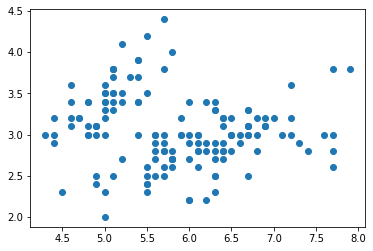

In [28]:
import matplotlib.pyplot as plt
plt.plot(data.sepal_length,data.sepal_width,ls='',marker='o')

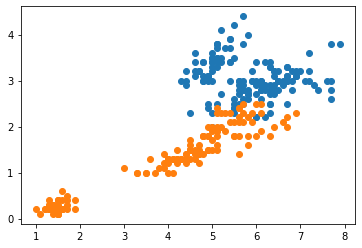

In [31]:
plt.plot(data.sepal_length,data.sepal_width,ls='',marker='o',label='sepal')
plt.plot(data.petal_length,data.petal_width,ls='',marker='o',label='petal')

### histographs with matplotlib

(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <a list of 25 Patch objects>)

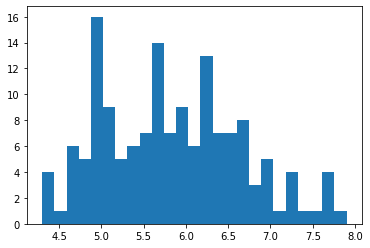

In [33]:
plt.hist(data.sepal_length,bins=25)

### customizing matplotlib plots

[Text(0, 0.5, 'ylabel'), Text(0.5, 0, 'xlabel'), Text(0.5, 1.0, 'Title')]

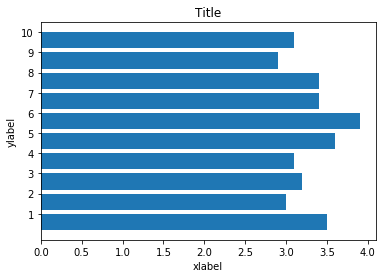

In [34]:
fig, ax = plt.subplots()
ax.barh(np.arange(10),data.sepal_width.iloc[:10])
ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel',ylabel='ylabel',title='Title')

### incorporating statistical calculations

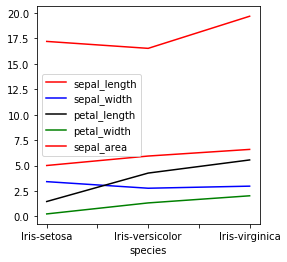

In [35]:
(data.groupby('species').mean().plot(color=['red','blue','black','green'],fontsize=10.0,figsize=(4,4)))

### statistical plotting with seaborn

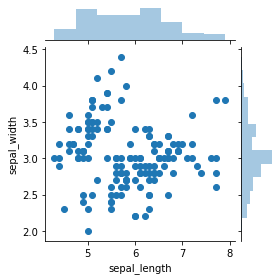

In [37]:
import seaborn as sns
sns.jointplot(x='sepal_length',y='sepal_width',data=data,height=4)

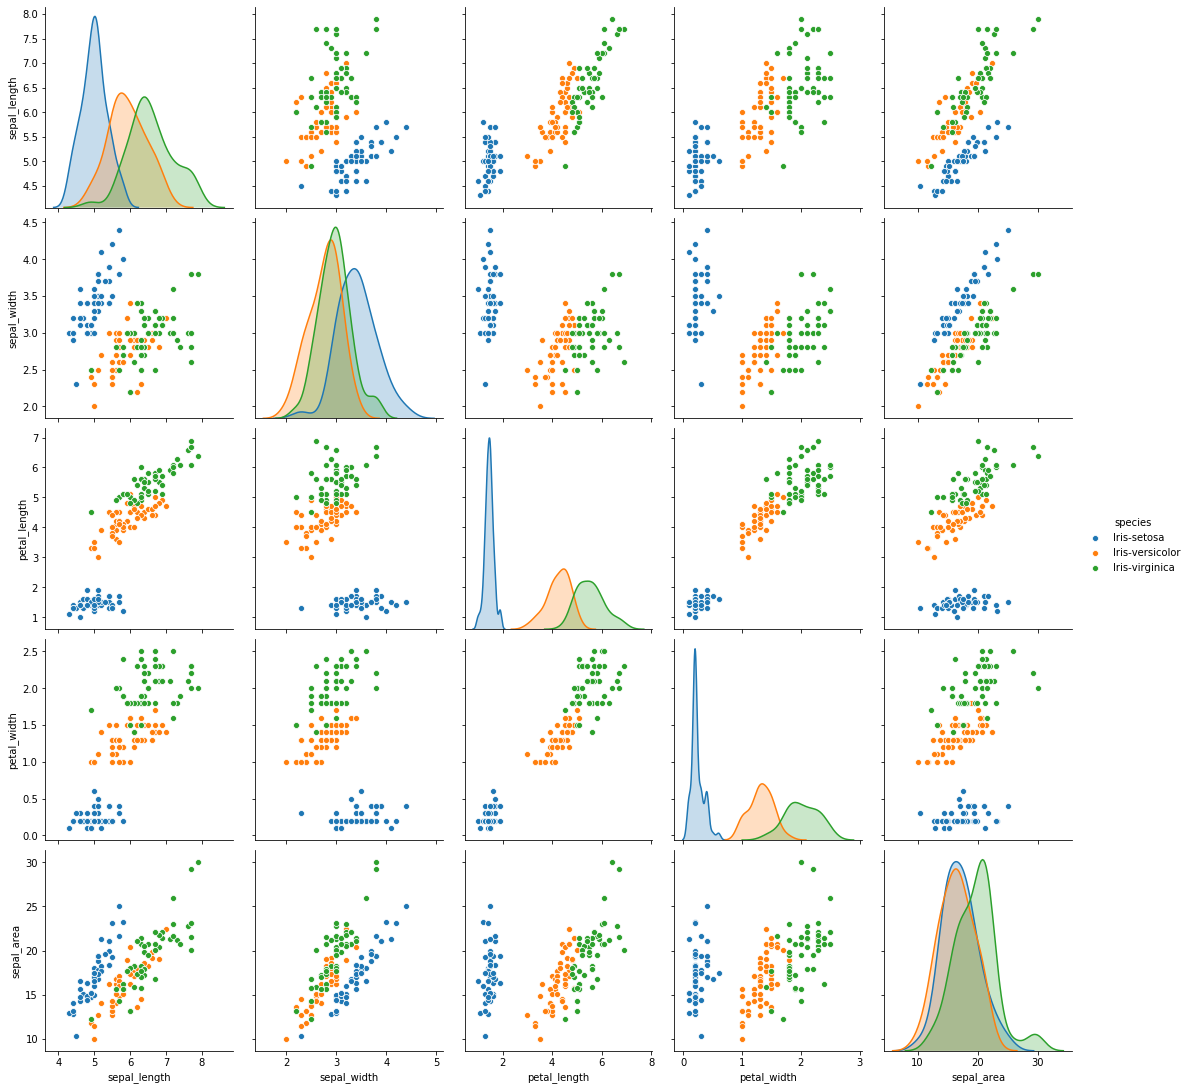

In [38]:
sns.pairplot(data,hue='species',height=3)